In [1]:
#モデルを試して行くぜ
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt



%matplotlib inline
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv("test.csv")
train_df_y = train_df[["y"]]
train_df = train_df.drop(["y"],axis=1)
train_df_y.reset_index()
df = pd.concat([train_df,test_df])
df['datetime'] = pd.to_datetime(df.datetime)
#何月か
df['Month'] = df['datetime'].dt.month
#何日か
df['DayofMonth'] = df['datetime'].dt.day
#何曜日か
df['dayofweek'] = df['datetime'].dt.dayofweek
#何年か
df['year'] = df['datetime'].dt.year
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df["year"])

df["year_num"] = le.transform(df["year"])
#ダミー変数化
#何月か
month_df = pd.get_dummies(df['Month'], prefix='M', prefix_sep='_')
#何日か
dayofmonth_df = pd.get_dummies(df["DayofMonth"], prefix='DM', prefix_sep='_')
#何曜日か
dayofweek_df = pd.get_dummies(df['dayofweek'], prefix='DW', prefix_sep='_')
#何年か
#year_df= pd.get_dummies(df['year'], prefix='y', prefix_sep='_')
#priceはどうか 
price_am_df = pd.get_dummies(df['price_am'], prefix='PA', prefix_sep='_')
price_pm_df = pd.get_dummies(df['price_pm'], prefix='PP', prefix_sep='_')
#datetimeを保存
df_id = df[['datetime']]
#year_df削除
df = pd.concat([df,
                month_df,
                dayofmonth_df,
                dayofweek_df,
               price_am_df,
               price_pm_df], axis=1)
train_df = df[0:2101].reset_index()
train_df = pd.concat([train_df,train_df_y],axis=1)
train_df = train_df.drop("index",axis=1)
test_df = df[2101:]

In [6]:
train_df[train_df["datetime"]>="2015-03-30"]

,datetime,client,close,price_am,price_pm,Month,DayofMonth,dayofweek,year,year_num,...,PA_4,PA_5,PP_-1,PP_0,PP_1,PP_2,PP_3,PP_4,PP_5,y
1733,2015-03-30,1,0,4,3,3,30,0,2015,5,...,1,0,0,0,0,0,1,0,0,87
1734,2015-03-31,1,0,4,3,3,31,1,2015,5,...,1,0,0,0,0,0,1,0,0,75
1735,2015-04-01,1,0,3,3,4,1,2,2015,5,...,0,0,0,0,0,0,1,0,0,61
1736,2015-04-02,1,0,2,2,4,2,3,2015,5,...,0,0,0,0,0,1,0,0,0,60
1737,2015-04-03,1,0,2,1,4,3,4,2015,5,...,0,0,0,0,1,0,0,0,0,75
1738,2015-04-04,1,0,4,3,4,4,5,2015,5,...,1,0,0,0,0,0,1,0,0,86
1739,2015-04-05,1,0,2,2,4,5,6,2015,5,...,0,0,0,0,0,1,0,0,0,69
1740,2015-04-06,1,0,1,1,4,6,0,2015,5,...,0,0,0,0,1,0,0,0,0,61
1741,2015-04-07,1,0,1,1,4,7,1,2015,5,...,0,0,0,0,1,0,0,0,0,54
1742,2015-04-08,0,0,0,0,4,8,2,2015,5,...,0,0,0,1,0,0,0,0,0,55


In [5]:
test_df

,datetime,client,close,price_am,price_pm,Month,DayofMonth,dayofweek,year,year_num,...,PA_3,PA_4,PA_5,PP_-1,PP_0,PP_1,PP_2,PP_3,PP_4,PP_5
0,2016-04-01,1,0,3,2,4,1,4,2016,6,...,1,0,0,0,0,0,1,0,0,0
1,2016-04-02,0,0,5,5,4,2,5,2016,6,...,0,0,1,0,0,0,0,0,0,1
2,2016-04-03,1,0,2,2,4,3,6,2016,6,...,0,0,0,0,0,0,1,0,0,0
3,2016-04-04,1,0,1,1,4,4,0,2016,6,...,0,0,0,0,0,1,0,0,0,0
4,2016-04-05,0,0,1,1,4,5,1,2016,6,...,0,0,0,0,0,1,0,0,0,0
5,2016-04-06,1,0,1,1,4,6,2,2016,6,...,0,0,0,0,0,1,0,0,0,0
6,2016-04-07,1,0,1,1,4,7,3,2016,6,...,0,0,0,0,0,1,0,0,0,0
7,2016-04-08,0,0,1,1,4,8,4,2016,6,...,0,0,0,0,0,1,0,0,0,0
8,2016-04-09,1,0,2,2,4,9,5,2016,6,...,0,0,0,0,0,0,1,0,0,0
9,2016-04-10,1,0,1,1,4,10,6,2016,6,...,0,0,0,0,0,1,0,0,0,0


In [4]:
X = train_df[train_df["close"]==0].drop(["datetime",'dayofweek',"DayofMonth","Month","y","year","price_am","price_pm"], axis=1)
Y = train_df[train_df["close"]==0]["y"]

In [6]:
X[X["year_num"]>=5]

,client,close,year_num,M_1,M_2,M_3,M_4,M_5,M_6,M_7,...,PA_3,PA_4,PA_5,PP_-1,PP_0,PP_1,PP_2,PP_3,PP_4,PP_5
1648,0,0,5,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1649,0,0,5,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1650,0,0,5,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1651,0,0,5,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1652,1,0,5,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1653,0,0,5,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1654,1,0,5,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1655,1,0,5,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1656,0,0,5,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1657,0,0,5,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


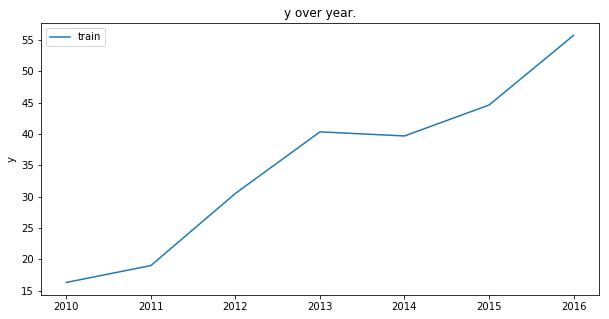

In [7]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(train_df.groupby("year")["y"].mean(),label='train')

plt.title('y over year.')
plt.legend(loc=0)
plt.ylabel('y')
plt.show()

In [17]:
from scipy import stats

 
# 説明変数に "density (濃度)" を利用
X = [1,2,3,4,5,6,7]
 
# 目的変数に "alcohol (アルコール度数)" を利用
Y = train_df.groupby("year")["y"].mean()
 
# 予測モデルを作成
slope, intercept, r_value, _, _ = stats.linregress(X, Y)
 
# 回帰係数
print(slope)
 
# 切片 (誤差)
print(intercept)

6.3793867979
9.63795869748


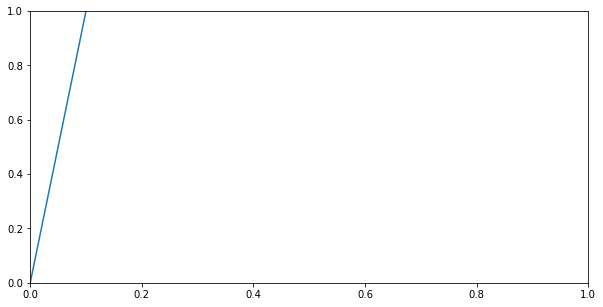

In [22]:
from matplotlib import lines
from matplotlib import pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
line = lines.Line2D([0, 10], [0,100])
ax.add_line(line)

In [56]:
from sklearn import linear_model

clf = linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
# fit_intercept: False に設定すると切片を求める計算を含めない。(デフォルト値: True)
# normalize: True に設定すると、説明変数を事前に正規化。 (デフォルト値: False)
# copy_X: メモリ内でデータを複製してから実行するかどうか。 (デフォルト値: True)
# n_jobs: 計算に使うジョブの数。-1 に設定すると、すべての CPU を使って計算。 (デフォルト値: 1)


 # Xの正規化、なぜか正規化しないとコケる
X = df_h["year_num"]
Y = df_h["y"]

# 単回帰を求める
clf.fit(X[:, None], Y)
# clf.coef_: 回帰係数、単回帰直線の傾き
# clf.intercept_: 切片（誤差）
# clf.score(X, Y): 決定係数
clf.coef_, clf.intercept_

(array([ 6.3793868]), 16.017345495375046)

In [39]:
X = train_df["year_num"].unique()

In [36]:
Y = train_df.groupby("year")["y"].mean().values

In [31]:
Y

array([ 16.29891304,  18.99178082,  30.5       ,  40.32054795,
        39.66575342,  44.59726027,  55.71428571])

In [43]:
df_h = pd.DataFrame(train_df.groupby("year_num")["y"].mean())

In [53]:
df_h = df_h.reset_index()

In [54]:
df_h

,year_num,y
0,0,16.298913
1,1,18.991781
2,2,30.500000
3,3,40.320548
4,4,39.665753
5,5,44.597260
6,6,55.714286


In [30]:
#カテゴリ変数はそのまま
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv("test.csv")
train_df_y = train_df[["y"]]
train_df = train_df.drop(["y"],axis=1)
train_df_y.reset_index()
df = pd.concat([train_df,test_df])
df['datetime'] = pd.to_datetime(df.datetime)
#何月か
df['Month'] = df['datetime'].dt.month
#何日か
df['DayofMonth'] = df['datetime'].dt.day
#何曜日か
df['dayofweek'] = df['datetime'].dt.dayofweek
#何年か
df['year'] = df['datetime'].dt.year
train_df = df[0:2101].reset_index()
train_df = pd.concat([train_df,train_df_y],axis=1)
train_df = train_df.drop("index",axis=1)
test_df = df[2101:]

In [37]:
#2010-07-01から2016-03-31
#2016-04-01から2017-03-31
#2015-03-25から2016-03-31
df_h = train_df[train_df["datetime"]>="2015-03-30"]
#xgboostで回帰モデル生成
import xgboost as xgb
#モデルのインスタンス作成
mod = xgb.XGBRegressor(max_depth=5,n_estimators=300)
X = df_h.drop(["datetime","y","year"], axis=1)
 

Y = df_h["y"]
#欠損値のデータを学習させずにモデル生成
mod.fit(X,Y,eval_metric=['mae'])

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=300, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [38]:
mod.score(X,Y)

0.99348292765512547

In [14]:
mod.predict(test_df.drop(["datetime","year"], axis=1))

array([  61.35803223,   63.81906128,   74.52057648,   69.489151  ,
         58.54545593,   62.91162109,   62.20386124,   61.98094177,
         69.14974213,   66.80875397,   39.9769516 ,   42.36838531,
         46.31112671,   43.71152115,   57.29698944,   50.32371902,
         45.76388168,   35.44634247,   32.54279709,   40.1783371 ,
         38.10475159,   53.81759644,   53.74765015,   45.8589592 ,
         58.06393814,   46.26660156,   53.06783676,   60.05829239,
         62.56344223,   60.36550522,   57.8580246 ,   49.26205444,
         51.38385773,   51.18649673,   45.13082123,   33.6815834 ,
         44.46693039,   41.45840073,   33.66481781,   29.73139381,
         30.1491909 ,   30.2150383 ,   44.22957611,   48.7575531 ,
         38.05683517,   34.78050995,   26.00518227,   31.28179741,
         29.9440136 ,   47.43643951,   51.23739243,   43.8326683 ,
         45.27326202,   41.09726715,   41.06651688,   42.77319717,
         50.82126999,   57.42737198,   58.36643982,   58.82538

In [19]:
xgb_pred = mod.predict(test_df.drop(["datetime","year"], axis=1))
test_df["y"] = xgb_pred + 6.3793867979
test_df["y"][test_df["close"]==1] = int(0)
submission = pd.concat([test_df.datetime, test_df.y], axis=1)
submission.to_csv("submission.csv", index=False,header=False)

/Users/haradakeno/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/haradakeno/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/haradakeno/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:5088: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

In [ ]:
#10.6499194186

In [20]:
submission

,datetime,y
0,2016-04-01,67.737419
1,2016-04-02,70.198448
2,2016-04-03,80.899963
3,2016-04-04,75.868538
4,2016-04-05,64.924843
5,2016-04-06,69.291008
6,2016-04-07,68.583252
7,2016-04-08,68.360329
8,2016-04-09,75.529129
9,2016-04-10,73.188141


In [ ]:
#9.0743250441

In [21]:
test_df[test_df["close"]==1]

,datetime,client,close,price_am,price_pm,Month,DayofMonth,dayofweek,year,y
137,2016-08-16,0,1,-1,-1,8,16,1,2016,0.0
274,2016-12-31,0,1,-1,-1,12,31,5,2016,0.0
275,2017-01-01,0,1,-1,-1,1,1,6,2017,0.0
276,2017-01-02,0,1,-1,-1,1,2,0,2017,0.0
277,2017-01-03,0,1,-1,-1,1,3,1,2017,0.0


In [26]:
submission[submission["y"]<=30]

,datetime,y
67,2016-06-07,29.214905
137,2016-08-16,0.000000
158,2016-09-06,27.990887
159,2016-09-07,29.668575
160,2016-09-08,29.731050
221,2016-11-08,29.822163
222,2016-11-09,24.919683
223,2016-11-10,27.153696
230,2016-11-17,29.452370
274,2016-12-31,0.000000


In [29]:
mod.predict(X)

array([  8.69607544e+01,   7.59733734e+01,   6.12043571e+01,
         6.01683922e+01,   7.36368179e+01,   8.61031647e+01,
         6.88938828e+01,   6.10797577e+01,   5.49243279e+01,
         5.41263046e+01,   5.67915039e+01,   6.71341400e+01,
         6.87693634e+01,   5.93561859e+01,   4.66031914e+01,
         3.60214653e+01,   4.64691010e+01,   3.25437965e+01,
         4.19512177e+01,   5.36636467e+01,   4.95840225e+01,
         3.59774094e+01,   3.87919312e+01,   4.96375160e+01,
         4.23782997e+01,   4.67407112e+01,   5.59152107e+01,
         5.38397369e+01,   5.74212074e+01,   5.76232338e+01,
         6.44767227e+01,   6.05952682e+01,   5.53491211e+01,
         4.50292625e+01,   5.92322578e+01,   5.78190041e+01,
         4.86187897e+01,   3.79501686e+01,   3.86594620e+01,
         3.13288155e+01,   3.54126625e+01,   3.41802826e+01,
         2.91882305e+01,   3.27932587e+01,   2.78261490e+01,
         3.02553768e+01,   3.85297165e+01,   4.15366821e+01,
         3.75293045e+01,

In [40]:
df_h

,datetime,client,close,price_am,price_pm,Month,DayofMonth,dayofweek,year,y
1733,2015-03-30,1,0,4,3,3,30,0,2015,87
1734,2015-03-31,1,0,4,3,3,31,1,2015,75
1735,2015-04-01,1,0,3,3,4,1,2,2015,61
1736,2015-04-02,1,0,2,2,4,2,3,2015,60
1737,2015-04-03,1,0,2,1,4,3,4,2015,75
1738,2015-04-04,1,0,4,3,4,4,5,2015,86
1739,2015-04-05,1,0,2,2,4,5,6,2015,69
1740,2015-04-06,1,0,1,1,4,6,0,2015,61
1741,2015-04-07,1,0,1,1,4,7,1,2015,54
1742,2015-04-08,0,0,0,0,4,8,2,2015,55
